In [713]:
import sys
import pickle
import numpy as np
import pprint
import matplotlib.pyplot as plt

from feature_format import featureFormat, targetFeatureSplit

In [714]:
features_list = ['poi','salary', 'expenses', 'total_stock_value', 'bonus', 'from_poi_to_this_person', 'shared_receipt_with_poi'] # You will need to use more features

financial_features = ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value',
'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']
email_features = ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
POI_label = ['poi']
total_features = POI_label + financial_features + email_features

In [715]:
original = "../input/final_project_dataset.pkl"
destination = "final_dataset.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))
        
data_dict = pickle.load(open("final_dataset.pkl", "rb") )

In [716]:
print( 'Total number of data points = ', len(data_dict))

# allocation across classes (POI/non-POI)
poi_count = 0
for employee in data_dict:
    if data_dict[employee]['poi'] == True:
        poi_count += 1
print ('number of POI = ', poi_count)
print ('number of non-POI = ', len(data_dict) - poi_count)

Total number of data points =  146
number of POI =  18
number of non-POI =  128


In [717]:
print ('total number of available features for every employee = ', len(total_features), 'which are: ', total_features)
print ('number of features used = ', len(features_list), 'which are: ', features_list)

total number of available features for every employee =  21 which are:  ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
number of features used =  7 which are:  ['poi', 'salary', 'expenses', 'total_stock_value', 'bonus', 'from_poi_to_this_person', 'shared_receipt_with_poi']


In [718]:
# are there features with many missing values? etc.
missing_values = {}
for feat in total_features:
    missing_values[feat] = 0

for emp in data_dict:
    for f in data_dict[emp]:
        if data_dict[emp][f] == 'NaN':
            missing_values[f] += 1
            # fill NaN values
            # data_dict[emp][f] = 0

print ('missing values: ', missing_values)

missing values:  {'poi': 0, 'salary': 51, 'deferral_payments': 107, 'total_payments': 21, 'loan_advances': 142, 'bonus': 64, 'restricted_stock_deferred': 128, 'deferred_income': 97, 'total_stock_value': 20, 'expenses': 51, 'exercised_stock_options': 44, 'other': 53, 'long_term_incentive': 80, 'restricted_stock': 36, 'director_fees': 129, 'to_messages': 60, 'email_address': 35, 'from_poi_to_this_person': 60, 'from_messages': 60, 'from_this_person_to_poi': 60, 'shared_receipt_with_poi': 60}


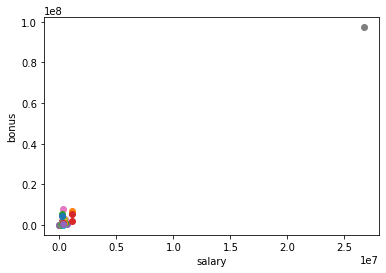

In [719]:
### Task 2: Remove outliers

def show_scatter_plot(dataset, feature1, feature2):
    """ given two features feature1 (x) and feature2 (y),
    this function creates a 2D scatter plot showing
    both x and y
    """
    data = featureFormat(dataset, [feature1, feature2])
    for p in data:
        x = p[0]
        y = p[1]
        plt.scatter(x, y)

    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

# identify outliers
show_scatter_plot(data_dict, "salary", "bonus")

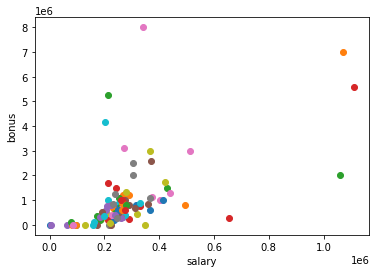

In [720]:
# remove them
data_dict.pop( "TOTAL", 0 )
show_scatter_plot(data_dict, "salary", "bonus")

In [723]:

print (features_list_n)

['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi', 'fraction_from_poi', 'fraction_to_poi']


In [724]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list_n, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [725]:
# intelligently select features (univariate feature selection)
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k = 10)
selector.fit(features, labels)
scores = zip(features_list_n[1:], selector.scores_)
sorted_scores = sorted(scores, key = takeSecond, reverse = True)
print ('SelectKBest scores: ', sorted_scores)

kBest_features = POI_label + [(i[0]) for i in sorted_scores[0:10]]
print ('KBest', kBest_features)

for emp in data_dict:
    for f in data_dict[emp]:
        if data_dict[emp][f] == 'NaN':
            # fill NaN values
            data_dict[emp][f] = 0

my_dataset = data_dict

kBest_features.remove('fraction_to_poi')


SelectKBest scores:  [('exercised_stock_options', 26.072941672944893), ('total_stock_value', 25.348673850647494), ('salary', 23.770231578776766), ('bonus', 20.974710696003893), ('long_term_incentive', 19.870598875622523), ('deferred_income', 15.896499023196773), ('fraction_to_poi', 11.583333333333332), ('total_payments', 9.957034634458488), ('restricted_stock', 9.486454961558342), ('shared_receipt_with_poi', 9.251139305175016), ('other', 8.034939274134839), ('loan_advances', 7.122246648449134), ('expenses', 6.1838731924800046), ('from_poi_to_this_person', 5.869084217202265), ('from_this_person_to_poi', 2.303043684451413), ('director_fees', 2.001002660565871), ('to_messages', 1.7402175966047715), ('restricted_stock_deferred', 0.8407310820613253), ('from_messages', 0.1759299115498897), ('deferral_payments', 0.08853560893631832), ('fraction_from_poi', 0.0)]
KBest ['poi', 'exercised_stock_options', 'total_stock_value', 'salary', 'bonus', 'long_term_incentive', 'deferred_income', 'fraction_

In [727]:
# dataset without new features
from sklearn import preprocessing
data = featureFormat(my_dataset, kBest_features, sort_keys = True)
labels, features = targetFeatureSplit(data)
scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)



In [733]:
# split 40% of the data for testing
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
from time import time
clf1 = GaussianNB()
clf1.fit(features_train, labels_train)
pred = clf1.predict(features_test)
nb_score = clf1.score(features_test, labels_test)
nb_acc = accuracy_score(labels_test, pred)
nb_pre = precision_score(labels_test, pred)
nb_rec = recall_score(labels_test, pred)
print ("NB accuracy: ", nb_acc)
print ("NB precision: ", nb_pre)
print ("NB recall: ", nb_rec)


NB accuracy:  0.8863636363636364
NB precision:  0.5
NB recall:  0.6


In [735]:
from sklearn import tree
clf2 = tree.DecisionTreeClassifier()
clf2.fit(features_train, labels_train)
pred = clf2.predict(features_test)
dt_score = clf2.score(features_test, labels_test)

dt_acc = accuracy_score(labels_test, pred)
dt_pre = precision_score(labels_test, pred)
dt_rec = recall_score(labels_test, pred)
print ("DT accuracy: ", dt_acc)
print ("DT precision: ", dt_pre)
print ("DT recall: ", dt_rec)

DT accuracy:  0.8409090909090909
DT precision:  0.25
DT recall:  0.2


In [737]:
from sklearn.ensemble import RandomForestClassifier
clf3 = RandomForestClassifier(n_estimators=10)
clf3.fit(features_train, labels_train)
pred = clf3.predict(features_test)
# rf_score = clf3.score(features_test, labels_test)

rf_acc = accuracy_score(labels_test, pred)
rf_pre = precision_score(labels_test, pred)
rf_rec = recall_score(labels_test, pred)
print ("RF accuracy: ", rf_acc)
print ("RF precision: ", rf_pre)
print ("RF recall: ", rf_rec)

RF accuracy:  0.8636363636363636
RF precision:  0.3333333333333333
RF recall:  0.2


In [738]:
pickle.dump(clf, open("my_classifier.pkl", "wb") )
pickle.dump(data_dict, open("my_dataset.pkl", "wb") )
pickle.dump(features_list, open("my_feature_list.pkl", "wb") )